<a href="https://colab.research.google.com/github/DrVenkataRajeshKumar/S10/blob/master/S10assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/DrVenkataRajeshKumar/EVA4Library.git
import sys
sys.path.append("/content/EVA4_LIBRARY/EVA4")

Cloning into 'EVA4Library'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 117 (delta 1), reused 0 (delta 0), pack-reused 111
Receiving objects: 100% (117/117), 41.87 KiB | 1.82 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [2]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-jm7wtlxc
All libraries are successfully installed!


In [3]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
n = 0
s = np.zeros(3)
sq = np.zeros(3)
for data, l in tqdm_notebook(train):
  x = np.array(data)/255
  s += x.sum(axis=(0,1))
  sq += np.sum(np.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = np.sqrt((sq/n - np.square(mu)))
print(mu, sq/n, std, n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



[0.49139968 0.48215841 0.44653091] [0.30249857 0.29176174 0.26781806] [0.24703223 0.24348513 0.26158784] 51200000


In [0]:
# add path to our library in default search path
import sys
sys.path.append('/content/drive/My Drive/EVA4')

In [0]:

import numpy as np
#import eva4datatransforms as eva4datatransforms
from torchvision import transforms
from eva4albumentations import Albumentations
channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
norm_mean_std=[channel_means,channel_stdevs]
# Train Phase transformations
train_transforms = Albumentations(norm_mean_std,Rotate=(-30,30),HorizontalFlip=True,RGBshift=(50,50,50),cutout=(3,))

# Test Phase transformations
test_transforms = Albumentations(norm_mean_std)

In [7]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import eva4dataloaders

dataloader = eva4dataloaders.DataLoader(batch_size=128)

# train dataloader
train_loader = dataloader.load(train)

# test dataloader
test_loader = dataloader.load(test)

torch.Size([128, 3, 32, 32])
torch.Size([128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


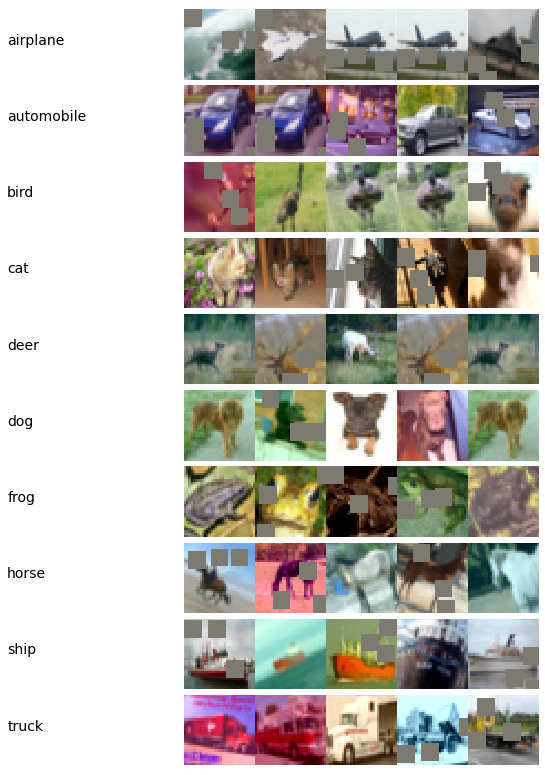

In [9]:
from __future__ import print_function
def unnormalize(img):
  img = img.cpu().numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [10]:
import rn
import torch
model = rn.ResNet18()
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
model.summary((3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

  pip install torch-lr-finder -v --global-option="amp"


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


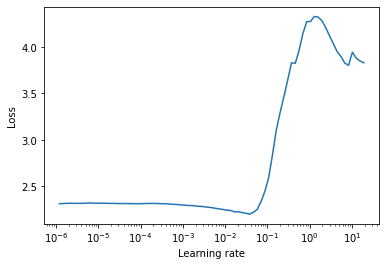

In [11]:
# LR finder fast ai approach
from lrfinder import LRFinder
import torch.optim as optim
import torch.nn as nn
L1lambda = 0
L2lambda = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7, momentum=0.9, nesterov=True, weight_decay=L2lambda)
lr_finder = LRFinder(model, optimizer, criterion, device=model.device)
lr_finder.range_test(train_loader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [0]:
loss = lr_finder.history['loss']
lr = lr_finder.history['lr']
#lr[loss.index(min(loss))]
optimizer = optim.SGD(model.parameters(), lr=lr[loss.index(min(loss))], momentum=0.9, nesterov=True, weight_decay=L2lambda)

In [13]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
EPOCHS = 50
#scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
#scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.5, steps_per_epoch=len(train_loader), epochs=EPOCHS)

scheduler = ReduceLROnPlateau(optimizer, min_lr=1e-7, mode='max', factor=0.5, patience=1, verbose=True)

model.gotrain(optimizer, train_loader, test_loader, EPOCHS, "/content/drive/My Drive", scheduler, False, L1lambda)


Validation loss decreased (100000.000000 --> 1.542091).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0130, Accuracy: 40.05%; Test set: Average loss: 1.5421, Accuracy: 48.38%
Learning Rate = 0.038019



Validation loss decreased (1.542091 --> 1.033208).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0092, Accuracy: 58.29%; Test set: Average loss: 1.0332, Accuracy: 64.49%
Learning Rate = 0.038019



Epoch     3: reducing learning rate of group 0 to 1.9009e-02.
Validation loss decreased (1.033208 --> 0.878938).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0074, Accuracy: 66.76%; Test set: Average loss: 0.8789, Accuracy: 70.79%
Learning Rate = 0.019009



Validation loss decreased (0.878938 --> 0.618319).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0059, Accuracy: 73.56%; Test set: Average loss: 0.6183, Accuracy: 78.53%
Learning Rate = 0.019009



Epoch     5: reducing learning rate of group 0 to 9.5047e-03.
Validation loss decreased (0.618319 --> 0.594739).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0053, Accuracy: 76.07%; Test set: Average loss: 0.5947, Accuracy: 79.76%
Learning Rate = 0.009505



Validation loss decreased (0.594739 --> 0.575715).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0045, Accuracy: 79.74%; Test set: Average loss: 0.5757, Accuracy: 80.72%
Learning Rate = 0.009505



Epoch     7: reducing learning rate of group 0 to 4.7524e-03.
Validation loss decreased (0.575715 --> 0.476621).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0042, Accuracy: 81.30%; Test set: Average loss: 0.4766, Accuracy: 84.00%
Learning Rate = 0.004752



Validation loss decreased (0.476621 --> 0.423678).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0037, Accuracy: 83.45%; Test set: Average loss: 0.4237, Accuracy: 85.57%
Learning Rate = 0.004752



Epoch     9: reducing learning rate of group 0 to 2.3762e-03.
Epoch: 9, Train set: Average loss: 0.0035, Accuracy: 84.58%; Test set: Average loss: 0.4383, Accuracy: 84.94%
Learning Rate = 0.002376



Validation loss decreased (0.423678 --> 0.416294).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0032, Accuracy: 85.88%; Test set: Average loss: 0.4163, Accuracy: 86.28%
Learning Rate = 0.002376



Epoch    11: reducing learning rate of group 0 to 1.1881e-03.
Validation loss decreased (0.416294 --> 0.392071).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0030, Accuracy: 86.61%; Test set: Average loss: 0.3921, Accuracy: 86.62%
Learning Rate = 0.001188



Validation loss decreased (0.392071 --> 0.381092).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0028, Accuracy: 87.36%; Test set: Average loss: 0.3811, Accuracy: 87.21%
Learning Rate = 0.001188



Epoch    13: reducing learning rate of group 0 to 5.9405e-04.
Validation loss decreased (0.381092 --> 0.371577).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0028, Accuracy: 87.74%; Test set: Average loss: 0.3716, Accuracy: 87.37%
Learning Rate = 0.000594



Validation loss decreased (0.371577 --> 0.369875).  Saving model ...
Epoch: 14, Train set: Average loss: 0.0027, Accuracy: 88.24%; Test set: Average loss: 0.3699, Accuracy: 87.66%
Learning Rate = 0.000594



Epoch    15: reducing learning rate of group 0 to 2.9702e-04.
Validation loss decreased (0.369875 --> 0.369224).  Saving model ...
Epoch: 15, Train set: Average loss: 0.0026, Accuracy: 88.59%; Test set: Average loss: 0.3692, Accuracy: 87.65%
Learning Rate = 0.000297



Validation loss decreased (0.369224 --> 0.366920).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0025, Accuracy: 88.94%; Test set: Average loss: 0.3669, Accuracy: 87.50%
Learning Rate = 0.000297



Epoch    17: reducing learning rate of group 0 to 1.4851e-04.
Validation loss decreased (0.366920 --> 0.361655).  Saving model ...
Epoch: 17, Train set: Average loss: 0.0025, Accuracy: 88.68%; Test set: Average loss: 0.3617, Accuracy: 87.86%
Learning Rate = 0.000149



Validation loss decreased (0.361655 --> 0.361338).  Saving model ...
Epoch: 18, Train set: Average loss: 0.0025, Accuracy: 88.74%; Test set: Average loss: 0.3613, Accuracy: 87.85%
Learning Rate = 0.000149



Epoch    19: reducing learning rate of group 0 to 7.4256e-05.
Validation loss decreased (0.361338 --> 0.361127).  Saving model ...
Epoch: 19, Train set: Average loss: 0.0025, Accuracy: 89.08%; Test set: Average loss: 0.3611, Accuracy: 87.82%
Learning Rate = 0.000074



Validation loss decreased (0.361127 --> 0.360668).  Saving model ...
Epoch: 20, Train set: Average loss: 0.0025, Accuracy: 89.10%; Test set: Average loss: 0.3607, Accuracy: 87.77%
Learning Rate = 0.000074



Epoch    21: reducing learning rate of group 0 to 3.7128e-05.
Epoch: 21, Train set: Average loss: 0.0025, Accuracy: 89.12%; Test set: Average loss: 0.3613, Accuracy: 87.91%
Learning Rate = 0.000037



Validation loss decreased (0.360668 --> 0.360365).  Saving model ...
Epoch: 22, Train set: Average loss: 0.0025, Accuracy: 89.09%; Test set: Average loss: 0.3604, Accuracy: 87.87%
Learning Rate = 0.000037



Epoch    23: reducing learning rate of group 0 to 1.8564e-05.
Validation loss decreased (0.360365 --> 0.359295).  Saving model ...
Epoch: 23, Train set: Average loss: 0.0025, Accuracy: 89.21%; Test set: Average loss: 0.3593, Accuracy: 87.81%
Learning Rate = 0.000019



Epoch: 24, Train set: Average loss: 0.0025, Accuracy: 89.04%; Test set: Average loss: 0.3603, Accuracy: 87.89%
Learning Rate = 0.000019



Epoch    25: reducing learning rate of group 0 to 9.2820e-06.
Validation loss decreased (0.359295 --> 0.358480).  Saving model ...
Epoch: 25, Train set: Average loss: 0.0025, Accuracy: 89.07%; Test set: Average loss: 0.3585, Accuracy: 87.91%
Learning Rate = 0.000009



Epoch: 26, Train set: Average loss: 0.0024, Accuracy: 89.31%; Test set: Average loss: 0.3597, Accuracy: 87.81%
Learning Rate = 0.000009



Epoch    27: reducing learning rate of group 0 to 4.6410e-06.
Epoch: 27, Train set: Average loss: 0.0025, Accuracy: 89.10%; Test set: Average loss: 0.3590, Accuracy: 87.76%
Learning Rate = 0.000005



Epoch: 28, Train set: Average loss: 0.0025, Accuracy: 89.15%; Test set: Average loss: 0.3606, Accuracy: 87.87%
Learning Rate = 0.000005



Epoch    29: reducing learning rate of group 0 to 2.3205e-06.
Validation loss decreased (0.358480 --> 0.358203).  Saving model ...
Epoch: 29, Train set: Average loss: 0.0025, Accuracy: 89.24%; Test set: Average loss: 0.3582, Accuracy: 87.85%
Learning Rate = 0.000002



Validation loss decreased (0.358203 --> 0.358160).  Saving model ...
Epoch: 30, Train set: Average loss: 0.0025, Accuracy: 89.01%; Test set: Average loss: 0.3582, Accuracy: 87.96%
Learning Rate = 0.000002



Epoch    31: reducing learning rate of group 0 to 1.1602e-06.
Epoch: 31, Train set: Average loss: 0.0025, Accuracy: 89.06%; Test set: Average loss: 0.3595, Accuracy: 87.75%
Learning Rate = 0.000001



Epoch: 32, Train set: Average loss: 0.0025, Accuracy: 89.12%; Test set: Average loss: 0.3606, Accuracy: 87.85%
Learning Rate = 0.000001



Epoch    33: reducing learning rate of group 0 to 5.8012e-07.
Validation loss decreased (0.358160 --> 0.358099).  Saving model ...
Epoch: 33, Train set: Average loss: 0.0025, Accuracy: 89.09%; Test set: Average loss: 0.3581, Accuracy: 87.98%
Learning Rate = 0.000001



Epoch: 34, Train set: Average loss: 0.0025, Accuracy: 89.11%; Test set: Average loss: 0.3584, Accuracy: 87.91%
Learning Rate = 0.000001



Epoch    35: reducing learning rate of group 0 to 2.9006e-07.
Epoch: 35, Train set: Average loss: 0.0025, Accuracy: 89.08%; Test set: Average loss: 0.3596, Accuracy: 87.78%
Learning Rate = 0.000000



Epoch: 36, Train set: Average loss: 0.0024, Accuracy: 89.19%; Test set: Average loss: 0.3599, Accuracy: 87.76%
Learning Rate = 0.000000



Epoch    37: reducing learning rate of group 0 to 1.4503e-07.
Epoch: 37, Train set: Average loss: 0.0025, Accuracy: 89.07%; Test set: Average loss: 0.3601, Accuracy: 87.91%
Learning Rate = 0.000000



Epoch: 38, Train set: Average loss: 0.0025, Accuracy: 89.17%; Test set: Average loss: 0.3595, Accuracy: 87.85%
Learning Rate = 0.000000



Epoch    39: reducing learning rate of group 0 to 1.0000e-07.
Epoch: 39, Train set: Average loss: 0.0025, Accuracy: 89.11%; Test set: Average loss: 0.3602, Accuracy: 87.91%
Learning Rate = 0.000000



Epoch: 40, Train set: Average loss: 0.0025, Accuracy: 88.92%; Test set: Average loss: 0.3590, Accuracy: 87.89%
Learning Rate = 0.000000



Epoch: 41, Train set: Average loss: 0.0025, Accuracy: 89.08%; Test set: Average loss: 0.3606, Accuracy: 87.92%
Learning Rate = 0.000000



Epoch: 42, Train set: Average loss: 0.0025, Accuracy: 88.94%; Test set: Average loss: 0.3596, Accuracy: 87.83%
Learning Rate = 0.000000



Epoch: 43, Train set: Average loss: 0.0024, Accuracy: 89.34%; Test set: Average loss: 0.3625, Accuracy: 87.80%
Learning Rate = 0.000000



Epoch: 44, Train set: Average loss: 0.0025, Accuracy: 89.13%; Test set: Average loss: 0.3593, Accuracy: 87.89%
Learning Rate = 0.000000



Epoch: 45, Train set: Average loss: 0.0025, Accuracy: 89.19%; Test set: Average loss: 0.3600, Accuracy: 87.84%
Learning Rate = 0.000000



Epoch: 46, Train set: Average loss: 0.0025, Accuracy: 88.89%; Test set: Average loss: 0.3599, Accuracy: 87.88%
Learning Rate = 0.000000



Epoch: 47, Train set: Average loss: 0.0025, Accuracy: 89.16%; Test set: Average loss: 0.3618, Accuracy: 87.84%
Learning Rate = 0.000000



Epoch: 48, Train set: Average loss: 0.0024, Accuracy: 89.24%; Test set: Average loss: 0.3588, Accuracy: 87.77%
Learning Rate = 0.000000



Epoch: 49, Train set: Average loss: 0.0025, Accuracy: 89.14%; Test set: Average loss: 0.3596, Accuracy: 87.95%
Learning Rate = 0.000000



Epoch: 50, Train set: Average loss: 0.0025, Accuracy: 88.90%; Test set: Average loss: 0.3599, Accuracy: 87.89%
Learning Rate = 0.000000



In [14]:
print(max(model.stats().train_acc))
print(max(model.stats().test_acc))

0.8934
0.8798


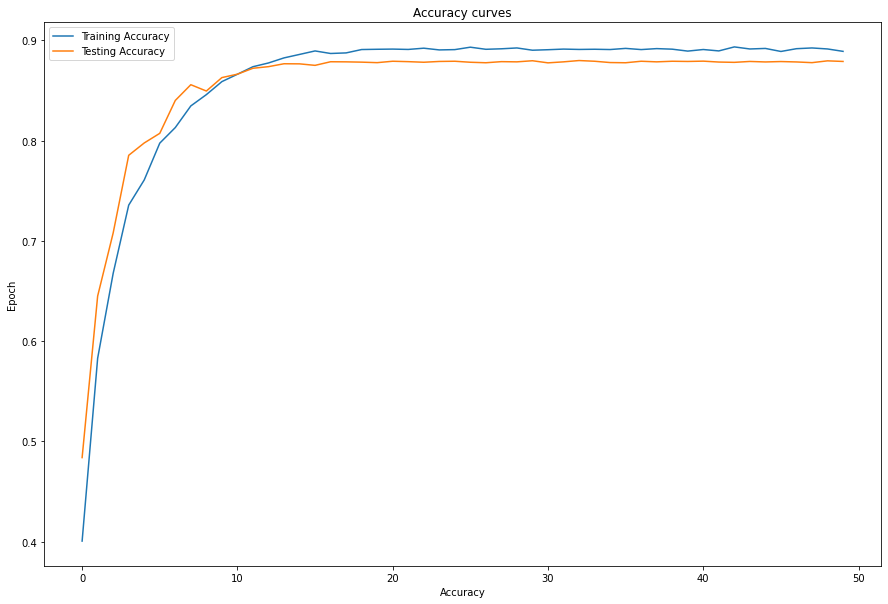

In [15]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
ax.plot(model.stats().train_acc)
ax.plot(model.stats().test_acc)

ax.set(title="Accuracy curves", xlabel="Accuracy", ylabel="Epoch")
ax.legend(['Training Accuracy', 'Testing Accuracy'], loc='best')
plt.savefig("TrainTestAccuracy.png")
plt.show()

In [16]:
len(model.stats().get_misclassified_images())

25

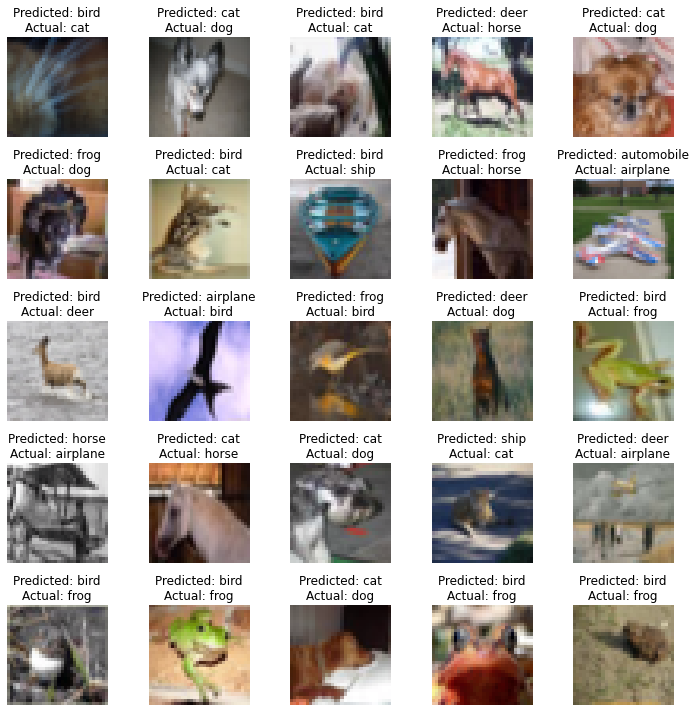

In [17]:
import plots

plots.plot_images(model.stats().get_misclassified_images(), class_names, "misclassified_imgs.png", mean=list(channel_means), std=list(channel_stdevs))

In [0]:
mimages = model.stats().get_misclassified_images()
images = []
target_classes = []
pred_classes = []
for i in mimages:
  images.append(i["img"])
  target_classes.append(int(i['target']))
  pred_classes.append(int(i['pred']))

In [19]:
print(target_classes)
print(pred_classes)

[3, 5, 3, 7, 5, 5, 3, 8, 7, 0, 4, 2, 2, 5, 6, 0, 7, 5, 3, 0, 6, 6, 5, 6, 6]
[2, 3, 2, 4, 3, 6, 2, 2, 6, 1, 2, 0, 6, 4, 2, 7, 3, 3, 8, 4, 2, 2, 3, 2, 2]


In [20]:
model.load_state_dict(torch.load(f"/content/drive/My Drive/{model.name}.pt"))

<All keys matched successfully>

torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


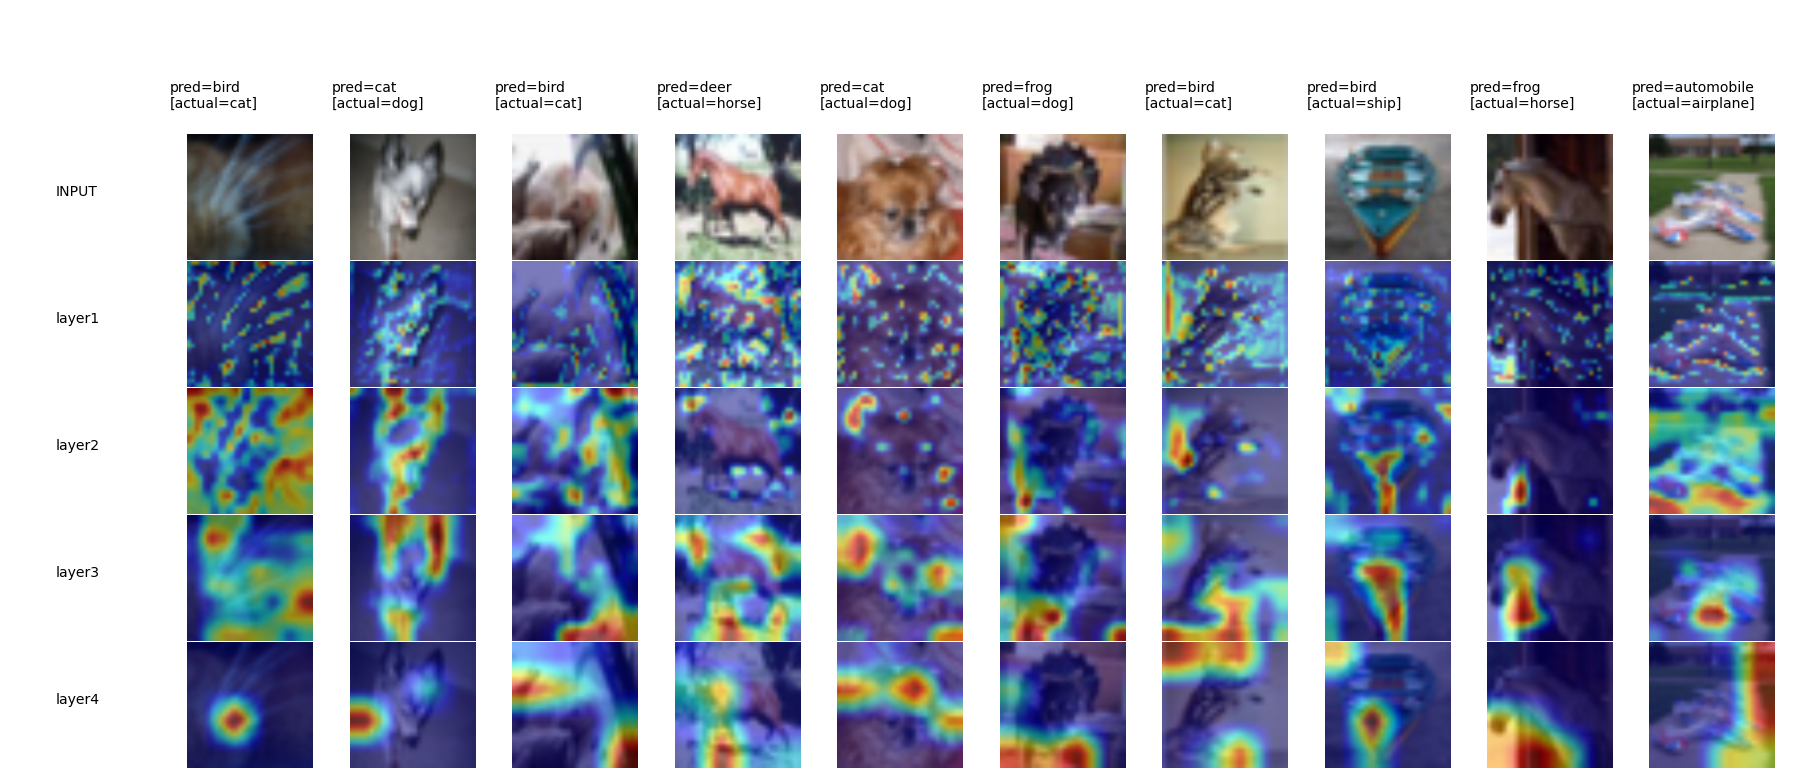

torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


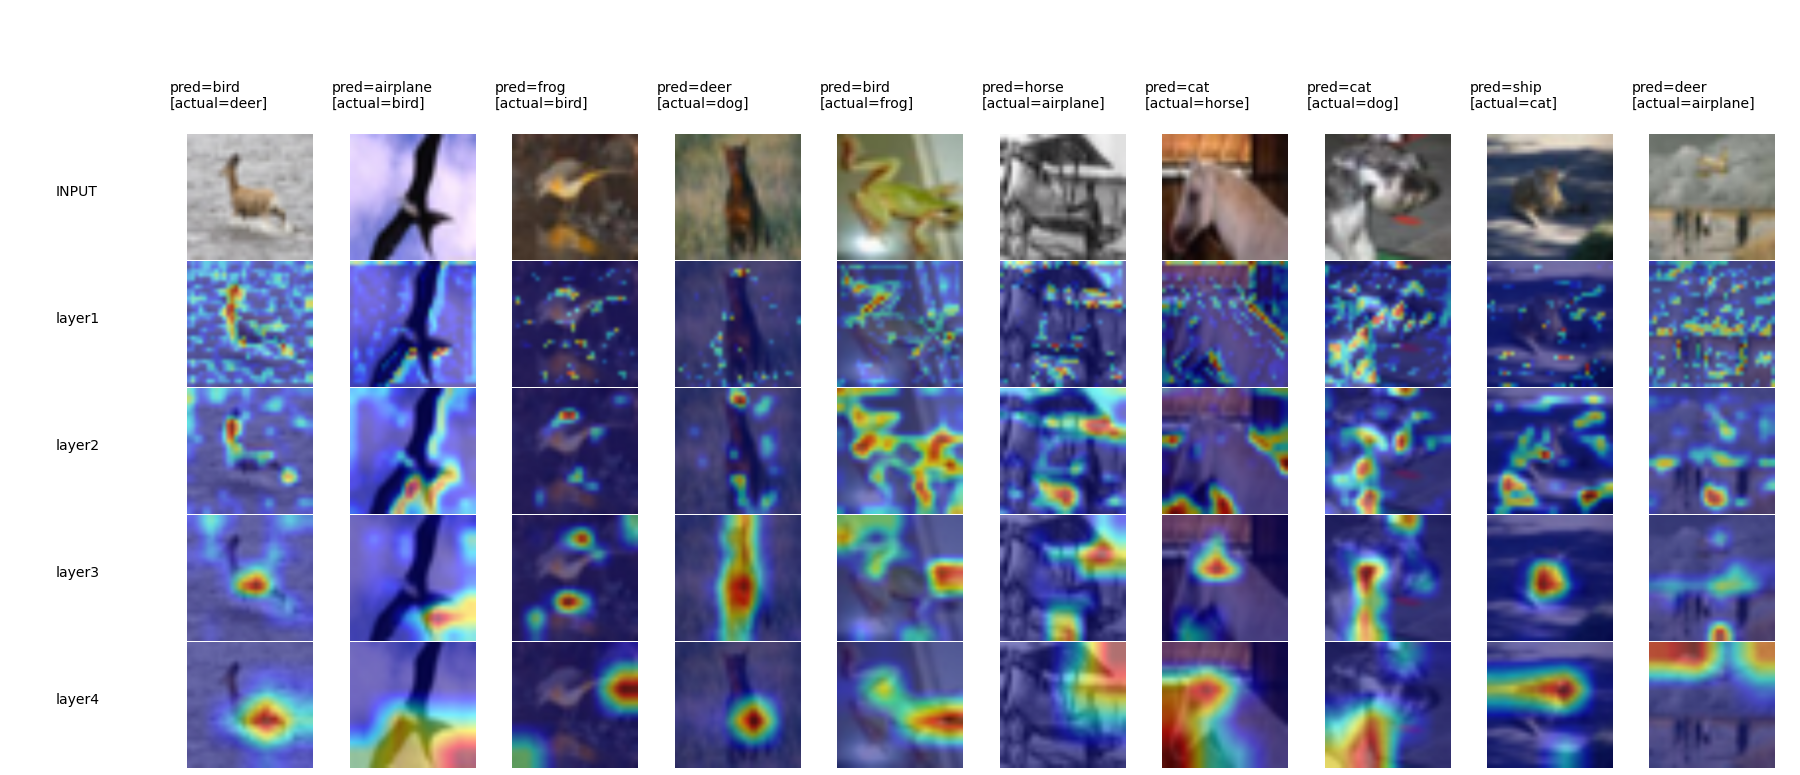

torch.Size([5, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


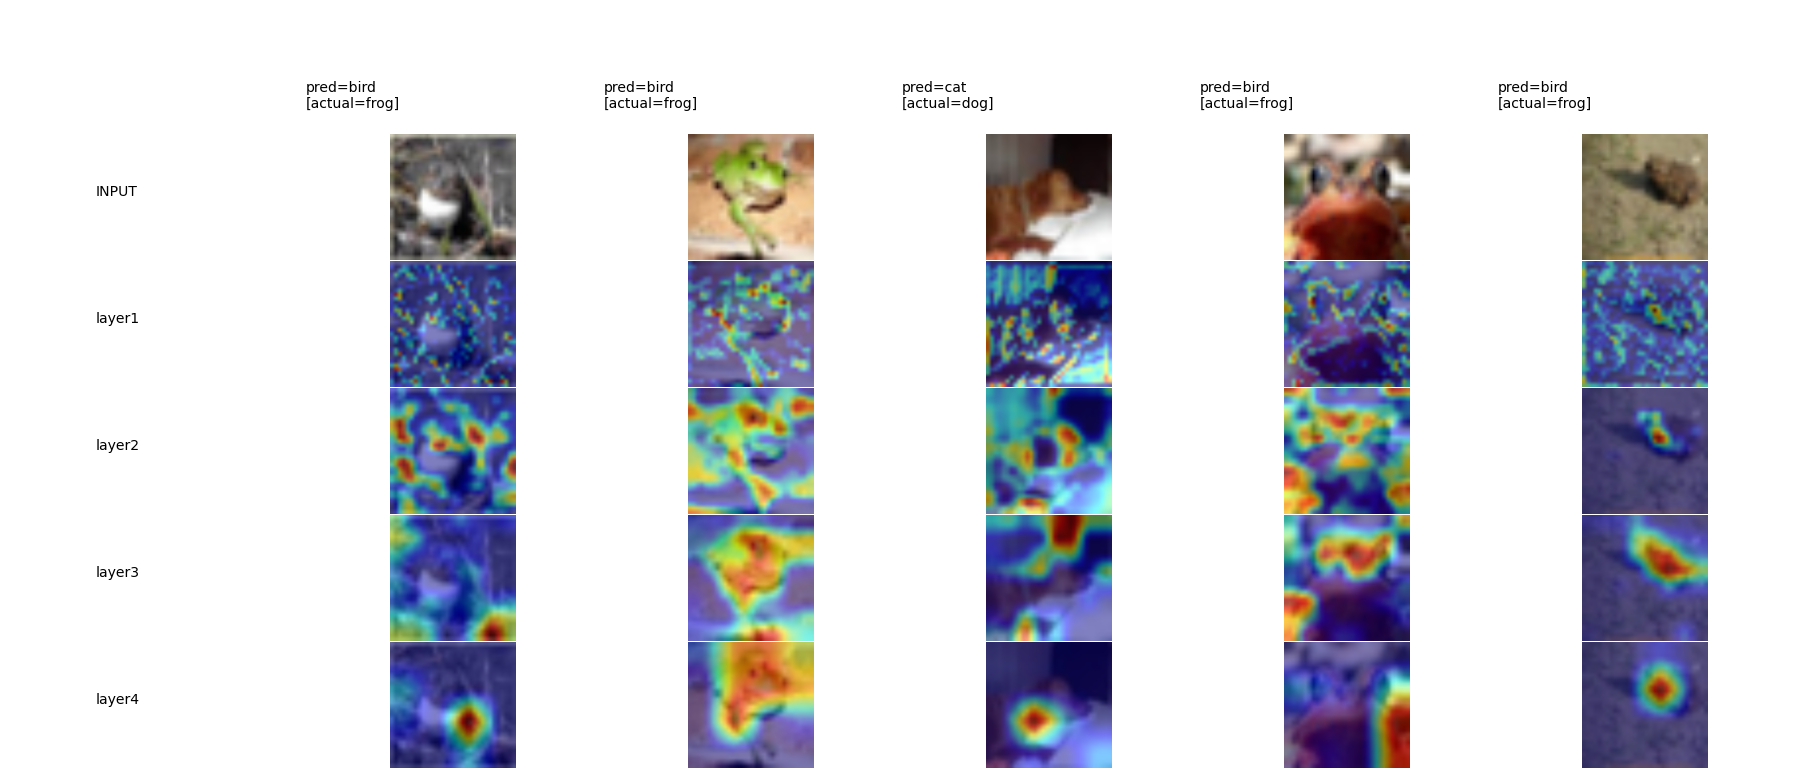

In [21]:
from gradcam import GRADCAM, PLOT
target_layers = ["layer1", "layer2", "layer3", "layer4"]
#Gradcam plot for first 10 misclassified images
gradcam_output, probs, predicted_classes = GRADCAM(images[:10], target_classes[:10], model, target_layers)
PLOT(gradcam_output, images[:10], target_classes[:10], target_layers, class_names, (3, 32, 32), predicted_classes, unnormalize)
#Gradcam plot for 11-20 misclassified images
gradcam_output, probs, predicted_classes = GRADCAM(images[10:20], target_classes[10:20], model, target_layers)
PLOT(gradcam_output, images[10:20], target_classes[10:20], target_layers, class_names, (3, 32, 32), predicted_classes, unnormalize)
#Gradcam plot for 21-25 misclassified images
gradcam_output, probs, predicted_classes = GRADCAM(images[20:], target_classes[20:], model, target_layers)
PLOT(gradcam_output, images[20:], target_classes[20:], target_layers, class_names, (3, 32, 32), predicted_classes, unnormalize)